# K-means Clustering

## Introduction

In this lesson, we'll learn about the most popular and widely-used clustering algorithm, K-means Clustering. 

## Objectives

You will be able to:

* Demonstrate an understanding of how the K-means Clustering algorithm works
* Perform K-means Clustering with scikit-learn and interpret the results
* Use metrics such as Calinski Harabaz Score (Variance Ratios) to determine the optimal value for k


## Clustering

**_Clustering_** techniques are among the most popular unsupervised machine learning algorithms. The main idea behind clustering is that you want to group objects into similar classes, in a way that:

* intra-class similarity is high
* inter-class similarity is low

What does _similarity_ mean? You should be thinking of it in terms of _distance_, just like we did with the K-Nearest Neighbors algorithm. The closer two points are, the higher their similarity.

When thinking about clustering, is useful to make a distinction between _hierarchical_ and _nonhierarchical_ clustering algorithms:

* In cluster analysis, an **_agglomerative hierarchical_** algorithm starts with _n_ clusters (where _n_ is the number of observations, so each observation is a cluster), then combines the two most similar clusters, combines the next two most similar clusters, and so on. A **_divisive_** hierarchical algorithm does the exact opposite, going from 1 to _n_ clusters.

* A **_nonhierarchical_** algorithm chooses _k_ initial clusters and reassigns observations until no improvement can be obtained. How initial clusters and reassignments are done depends on the specific type of algorithm.

An essential understanding when using clustering methods is that you are basically trying to group data points together without actually knowing what the _actual_ cluster/classes are. This is also the main distinction between clustering and classification (which is a supervised learning method). This is why technically, you also don't know how many clusters you're looking for.

## Non-Hierarchical Clustering With K-means Clustering

**_K-means Clustering_** is the most well-known clustering technique, and belongs to the class of non-hierarchical clustering methods. When performing K-means Clustering, you're essentially trying to find $k$ cluster centers as the mean of the data points that belong to these clusters. One challenging aspect of K-means is that the number _k_ needs to be decided upon before you start running the algorithm.

The K-means Clustering algorithm is an iterative algorithm that reaches for a pre-determined number of clusters within an unlabeled dataset, and basically works as follows:

1. Select k initial seeds
2. Assign each observation to the cluster to which it is "closest"
3. Recompute the cluster centroids
4. Reassign the observations to one of the clusters according to some rule
5. Stop if there is no reallocation.

Two assumptions are of main importance for the k means clustering algorithm:

1. To compute the "cluster center", you calculate the (arithmetic) mean of all the points belonging to the cluster.  Each cluster center is recalculated in the beginning of each new iteration.  
2. After the cluster center has been recalculated, if a given point is now closer to a different cluster center than the center of its current cluster, then that point is reassigned to the closer center. 


## Visualization of K-means Clustering Algorithm in Action

In the animation below, the green dots are the centroids. Notice how they are randomly assigned in the beginning, and shift with each iteration as they are recalculated to match the center of the points assigned to their cluster. The clustering ends when the the centroids find a position in which points are no longer reassigned, meaning that the centroids no longer need to move. 


<img src='images/good-centroid-start.gif'>

## Implementing K-means Clustering in scikit-learn

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=10, centers=3, n_features=2,
                  random_state=0)
print(X.shape)

In [5]:
y

array([0, 0, 1, 0, 2, 2, 2, 1, 1, 0])

In [6]:
X

array([[ 1.12031365,  5.75806083],
       [ 1.7373078 ,  4.42546234],
       [ 2.36833522,  0.04356792],
       [ 0.87305123,  4.71438583],
       [-0.66246781,  2.17571724],
       [ 0.74285061,  1.46351659],
       [-4.07989383,  3.57150086],
       [ 3.54934659,  0.6925054 ],
       [ 2.49913075,  1.23133799],
       [ 1.9263585 ,  4.15243012]])

Implementing K-means Clustering with scikit-learn is quite simple, because the API mirrors the same functionality. The same preprocessing steps are required as for supervised learning--null values must be dealt with, and all data must be in numerical format (meaning that non-numerical columns must be dropped or converted to one-hot encoded format). 

In [7]:
from sklearn.cluster import KMeans # import from sklearn
k_means = KMeans(n_clusters=3) # Must set number of clusters at initialization time!
k_means.fit(X) # Run the clustering algorithm
cluster_assignments = k_means.predict(X) # Generate cluster index values for each row in df

# cluster predictions for each point are also stored in k_means.labels_ attribute

In [12]:
cluster_assignments.shape

(10,)

In [9]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline


In [11]:
X.shape

(10, 2)

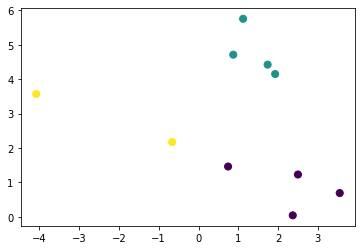

In [17]:
plt.scatter(X[:,0], X[:,1], c=cluster_assignments, s=50)

In [30]:
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 4, cluster_std=1)

In [31]:
k_means = KMeans(n_clusters=4)
y_label = k_means.fit_predict(X)

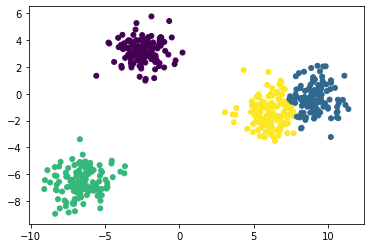

In [32]:
plt.scatter(X[:,0], X[:,1], c=y_label, s=25)

## Evaluating Cluster Fitness

Running K-means on a dataset is easy enough, but how do we know if we have the best value for K?  The best bet is to use an accepted metric for evaluating cluster fitness such as [**_Calinski Harabaz Score_**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabaz_score.html), which is more often referred to by a simpler, **_Variance Ratio_**.

### Computing Variance Ratios

The _variance Ratio_ is a ratio of the variance of the points within a cluster, to the variance of a point to points in other clusters. Intuitively, we can understand that we want intra-cluster variance to be low (suggesting that the clusters are tightly knit), and inter-cluster variance to be high(suggesting that there is little to no ambiguity about which cluster the points belong to). 

We can easily calculate the variance ratio by importing a function from Scikit-learn to calculate it for us, as seen below. To use this metric, we just need to pass in the points themselves, and the labels predicted given to each point by the clustering algorithm. The higher the score, the better the fit.

```python  
# This code builds on the previous example
from sklearn.metrics import calinski_harabaz_score


print(calinski_harabaz_score(some_df, cluster_assignments))
# Note that we could also pass in k_means.labels_ instead of cluster_assignments, as they are the same thing
```
There are other metrics that can also be used to evaluate the fitness, such as [Silhouette Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score). No one metric is best--they all have slightly different strengths and weaknesses depending upon the given dataset and goals. Because of this, it's generally accepted that it's best to pick one metric and stick to it. 

### Finding the Optimal Value of K

Now that we have a way to evaluate how well our clusters fit our dataset, we can use this to find the optimal value for K. The best way to do this is to create and fit a different K-means Clustering object for every value of K that we want to try, and then compare the Variance Ratio scores for each. 

We can then visualize the scores using an **_Elbow Plot_**:

<img src='images/new_elbow-method.png' width='500'>

An _Elbow Plot_ is a general term for plots like this, where we can easily see where we hit a point of diminishing returns. In the plot above, we can see that performance peaks at _k=6_, and then begins to drop off. That tells us that our data most likely has 6 naturally occurring clusters in our data. 

Elbow Plots aren't exclusively used with Variance ratios--it's also quite common to calculate something like distortion (another clustering metric), which will result in a graph with a negative as opposed to a postive slope. 

<img src='images/new_elbow_2.png' width="500">

#### Understanding the Elbow

A note on Elbow Plots: higher scores aren't always better. Higher values of K mean introducing more overall complexity--we will sometimes see elbow plots that look like this:



<img src='images/new_dim_returns.png' width="500">

In the example above, although k=20 technically scores better than k=4, we choose k=4 because it is the **_Elbow_** on the graph. After the elbow, the metric we're trying to optimize for gets better at a much slower rate. Dealing with 20 clusters, when the fit is only slightly better, isn't worth it--it's better to treat our data as having only 4 clusters, because that is the simplest overall model that provides the most value with the least complexity!


##  Summary

In this lesson, we learned about the different kinds of clustering, and explored how the K-means Clustering algorithm works. We also learned about how we can quantify the performance of a clustering algorithm using metrics such as Variance Ratios, and how we can use these metrics to find the optimal value for K by creating Elbow Plots!